In [8]:
%load_ext autoreload
%autoreload 2
from pixell import enmap,utils
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Understanding map geometeries

You can create a geometry for a given pixel width (resolution) centered at the origin of a CAR projection with 1024 pixels across as follows.

In [43]:
shape,wcs = enmap.geometry(shape=(1024,1024),res=np.deg2rad(0.5/60.),pos=(0,0))

In [44]:
print(shape)
print(wcs)

(1024, 1024)
car:{cdelt:[0.008333,0.008333],crval:[0,0],crpix:[512,512]}


In [45]:
posmap = enmap.posmap(shape,wcs)
print(posmap.shape)

(2, 1024, 1024)


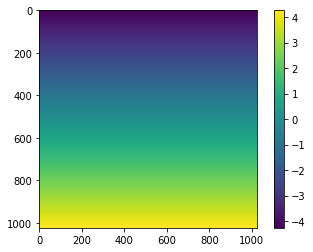

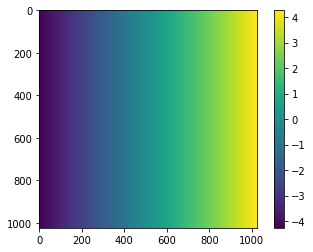

In [46]:
dec,ra = np.rad2deg(posmap)
plt.imshow(dec)
plt.colorbar()
plt.show()
plt.imshow(ra)
plt.colorbar()
plt.show()


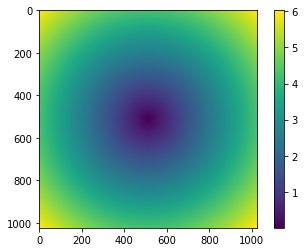

In [47]:
modrmap = enmap.modrmap(shape,wcs)
plt.imshow(np.rad2deg(modrmap))
plt.colorbar()
plt.show()

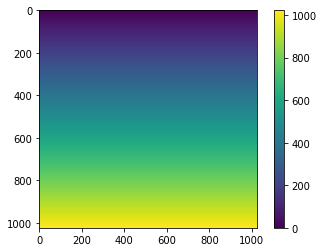

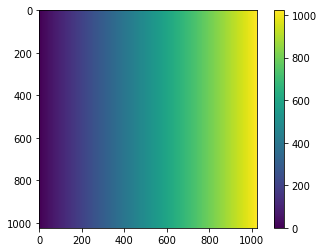

In [48]:
pixmap = enmap.pixmap(shape,wcs)
py,px = pixmap
plt.imshow(py)
plt.colorbar()
plt.show()
plt.imshow(px)
plt.colorbar()
plt.show()

## Understanding 2D Fourier space

/home/msyriac/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


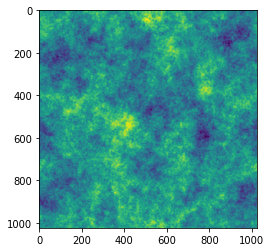

In [55]:
ells = np.arange(0,4000,1)
ps = 1/ells**2.5
ps[:2] = 0
imap = enmap.rand_map(shape,wcs,ps[None,None])
plt.imshow(imap)
plt.show()

In [56]:
kmap = enmap.fft(imap,normalize="phys")
print(kmap.shape)
print(kmap.dtype)

(1024, 1024)
complex128


(2, 1024, 1024)


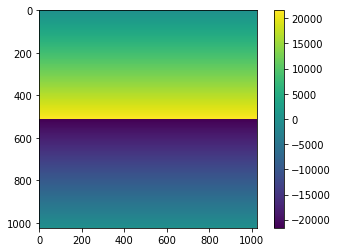

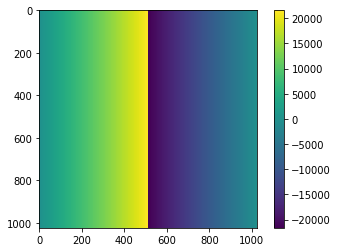

In [59]:
lmap = enmap.lmap(shape,wcs)
print(lmap.shape)
lymap,lxmap = lmap
plt.imshow(lymap)
plt.colorbar()
plt.show()
plt.imshow(lxmap)
plt.colorbar()
plt.show()

In [60]:
ly,lx = enmap.laxes(shape,wcs)
print(ly.shape,lx.shape)
print(ly)
print(lx)

(1024,) (1024,)
[   0.       42.1875   84.375  ... -126.5625  -84.375   -42.1875]
[   0.           42.22633561   84.45267122 ... -126.67900682  -84.45267122
  -42.22633561]


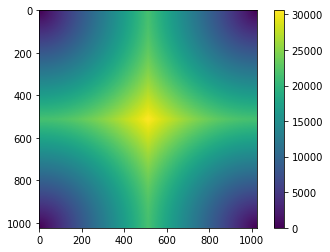

In [61]:
modlmap = enmap.modlmap(shape,wcs)
plt.imshow(modlmap)
plt.colorbar()
plt.show()

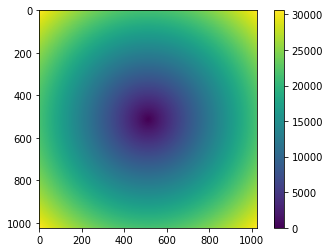

In [62]:
plt.imshow(np.fft.fftshift(modlmap))
plt.colorbar()
plt.show()

In [ ]:
p2d = np.real(kmap * kmap.conj())
plt.imshow(p2d)